<blockquote>
    
<b>Степан, привет!</b>
    
Меня зовут Макаев Андрей, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты" Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта.

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница

Можешь оформлять их так:

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
 </div>
    
Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>
В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>

Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!
</blockquote>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Хорошее введение

### Откройте файл с данными и изучите общую информацию. 

#### 1.1 Импортируем библиотеки и данные из файла в датафрейм:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('D:\\real_estate_data.csv', sep='\t')

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>
    
Лучше разделять ячейки с имортом библиотек и загрузкой данных.

#### 1.2 Изучаем общую информацию о полученном датафрейме:

In [2]:
data.info()

data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


#### 1.3 Строим общую гистограмму для всех числовых столбцов таблицы:

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

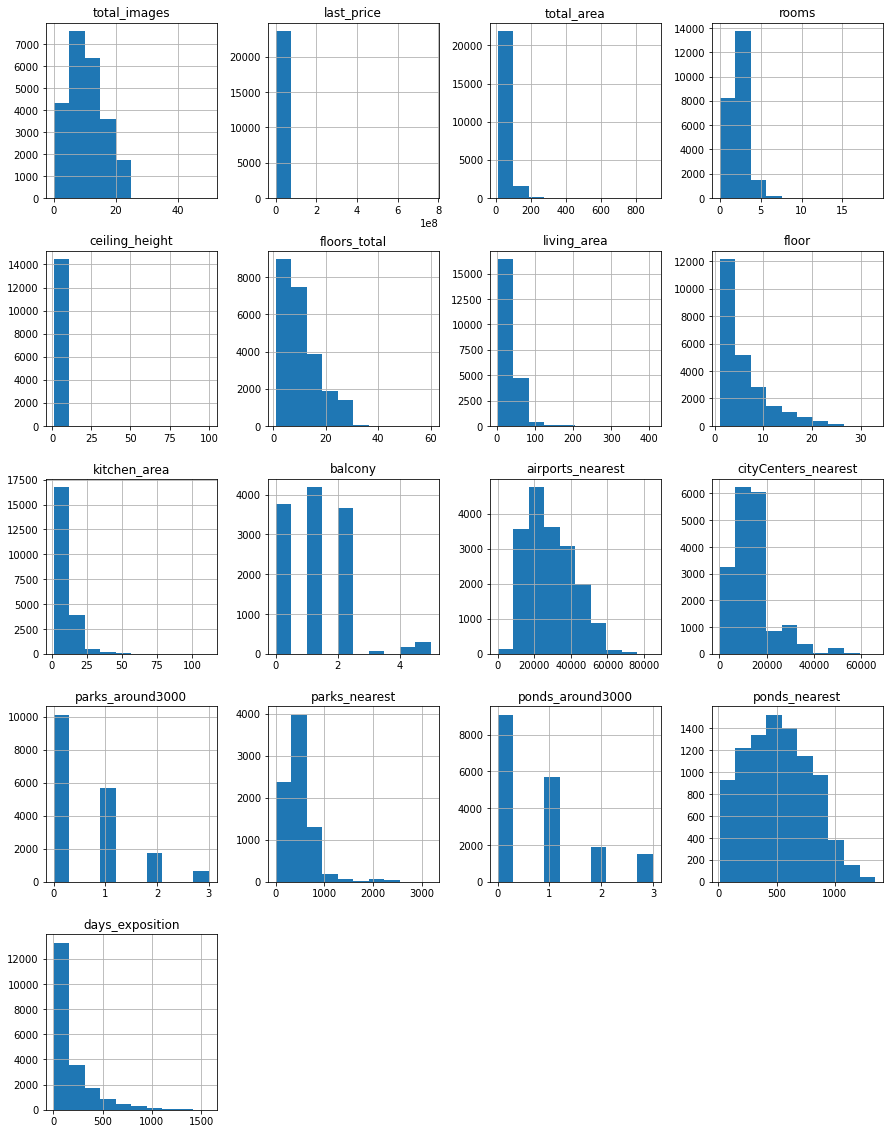

In [3]:
data.hist(figsize=(15, 20))

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Данные прочитаны, предварительный осмотр проведен.

Чтобы не было множества технических надписей над графиком нужно добавить символ ; в конце строки

### Предобработка данных

#### 2.1 Находим количество пропущенных значений в столбцах

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Обнаружены пропуски в следующих столбцах:
- "ceiling_height" - пропуски после обработки аномалий заполним медианой квартир из этого же населённого пункта;
- "floors_total" - заполнить не сможем, удалим;
- "living_area" и "kitchen_area" - удалим строки, где пропущены оба значения, остальные заполним медианой из квартир с такой же общей площадью;
- "is_apartment" - можем предположить, что т.к. апартаменты - спецефический тип недвижимости, не указывать об этом факте в объявлении - плохое решение, заполним значением False;
- "balcony" - можем предположить, что если информацию о балконах не заполняли, то их нет;
- "locality_name" - заполнить не сможем, будут мешать - лучше удалить строки с пустыми значениями;
- "airports_nearest", "cityCenters_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest" - данные в этих столбцах заполнялись автоматически, значит причина их отсутствия может быть технической, лучше не трогать (можно было бы попросить проверить алогритм, который это делает, возможно есть какие-то ошибки);
- "days_exposition" - заполнить не сможем, удалять не будем (возможно объявления с пропусками в этом поле ещё активны, т.е. квартира не продана);

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>
    
Удалять данные не стоит. Если не можешь заполнить корректно пропуски их можно оставить - то для каких-то объявлений не указана этажность дома, не помешает тебе проанализировать стоиомость квартиры в зависимости от площади, например.
    
Сейчас ты удаляешь почти 2 тысячи строк, с которыми можно было бы работать.
    
В остальном в целом со всем согласен.

#### 2.2 Обрабатываем пропуски и аномалии в столбцах

In [5]:
# удаляем пропуски в floors_total и locality_name
data = data.dropna(subset=['floors_total', 'locality_name'])

In [6]:
# удаляем строки где нет значений и в living_area и kitchen_area и те строки где kitchen_area больше чем living_area
data = data.query('not (living_area != living_area and kitchen_area != kitchen_area)').query('not kitchen_area > living_area')

In [7]:
# удаляем те квартиры, где больше 8 комнат как выбивающиеся
print(data['rooms'].value_counts())
data = data.query('not rooms > 8')

2     7329
1     7272
3     5419
4     1099
5      299
0      183
6       99
7       54
8       12
9        7
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64


In [8]:
# удаляем квартиры которые стоят больше 50 млн как выбивающиеся
print(data.query('last_price > 50000000').shape[0])
data = data.query('not last_price > 50000000')

110


In [9]:
# удаляем квартиры больше 200 м2 как выбивающиеся
print(data.query('total_area > 200').shape[0])
data = data.query('not total_area > 200')

120


<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>
    
ПОсле фильтрации данных стоит проверить сколько данных в итоге было удалено. Это можно сделать сравнив размер датафрейма до и после.

In [10]:
# создаём отдельный столбец для устранения проблемы неявных дупликатов в столбце locality_name,
# где остаётся только название населённого пункта
data['locality_name_standardized'] = (
data['locality_name']
    .str.lower()
    .str.replace('ё', 'е')
    .str.replace('деревня ', '')
    .str.replace('поселок ', '')
    .str.replace('городского типа ', '')
    .str.replace('городской ', '')
    .str.replace('коттеджный ', '')
    .str.replace('садовое товарищество ', '')
    .str.replace('садоводческое некоммерческое товарищество ', '')
    .str.replace('пансионат ', '')
    .str.replace('село ', '')
)

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>
    
После замены стоит проверить насколько успешно удалились дубликаты. ДЛя этого можно воспользоваться методом .nunique() - он показывает количество уникальных значений в признаке.

In [11]:
# скорее всего пользовтатели не указывали что квартира - это не апартамент, и указывали если апартамент
data['is_apartment'] = data['is_apartment'].fillna(False)

In [12]:
# скорее всего пользователи не указывали информацию о количестве балконов если балконов нет
data['balcony'] = data['balcony'].fillna(0)

In [13]:
# заполняем значение kitchen_area медианой из квартир с примерно той же площадью
for value in data['total_area'].round(0).unique():
    data.loc[(data['total_area'].round(0) == value) & (data['kitchen_area'].isna()), 'kitchen_area'] =\
    data.loc[(data['total_area'].round(0) == value), 'kitchen_area'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [14]:
# заполняем значение living_area медианой из квартир с примерно той же площадью
for value in data['total_area'].round(0).unique():
    data.loc[(data['total_area'].round(0) == value) & (data['living_area'].isna()), 'living_area'] =\
    data.loc[(data['total_area'].round(0) == value), 'living_area'].median()

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>
    
Идея такого заполнения хорошая, но можно её немного улучшить. Как ты правильно заметил - жилая и кухонная площадь коррелируют с общей. Поэтому можно высчитать коэффициент как в среднем соотносятся между собой общая и жилая площадь, и после этого заполнить пропуски умножив общую площадь на коэффициент. Тогда у тебя не будет пропусков после заполнения.

In [15]:
# делим все значения в ceiling_height выше 20 на 10, чтобы сделать из потолков 32 м значение 3.2
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = \
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

In [16]:
# удаляем все значения ниже 2 метров и выше 4 метров
data = data.query('not (ceiling_height < 2 or ceiling_height > 4)')

In [17]:
# заполняем пропуски в ceiling_height
for locality in data['locality_name_standardized'].unique():
    data.loc[(data['locality_name_standardized'] == locality) & (data['ceiling_height'].isna()), 'ceiling_height'] =\
    data.loc[(data['locality_name_standardized'] == locality), 'ceiling_height'].median()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [18]:
# удаляем те значения, которые не удалось заполнить в предыдущих шагах и обновляем индексы
data = data.dropna(subset=['kitchen_area', 'living_area', 'ceiling_height']).reset_index(drop=True)

<div class="alert alert-warning">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b>
    
Всё в целом хорошо - ты разобрался с пропусками, аномалиями и удалил выбросы, но лучше делать это на разных подэтапах. То есть подзаголовок - работа с пропусками, потом дубликаты в названиях, и работа с аномалиями и выбросами. Так твой проект будет структурированнее и в нём будет проще ориентироваться.
    

#### 2.3 Изменяем тип данных

In [19]:
# переводим формат ячеек с балконами и этажами в целочисленную (их не может быть нецелое количество)
data['balcony'] = data['balcony'].astype('int')
data['floor'] = data['floor'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

In [20]:
# переводим столбец "first_day_exposition" в формат date-time
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')

In [21]:
# переведём цену за квартиру в млн. руб чтобы удобнее было строить графики
data['last_price'] = data['last_price'] / 1000000

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Посчитайте и добавьте в таблицу новые столбцы

In [22]:
# добавляем столбец с ценой одного квадратного метра
def m2_price(row):
    m2 = (row['last_price'] * 1000000) / row ['total_area']
    return m2

data['m2_price'] = data.apply(m2_price, axis=1).round(2)

In [23]:
# добавляем столбцы с днём недели, месяцем и годом публикации
data['day_of_week_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [24]:
# добавляем столбцы с типом этажа квартиры (сделаем его категорией) и расстоянием до центра города в километрах
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1).astype('category')
data['city_center_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Проведите исследовательский анализ данных

#### 4.1 Изучим основные параметры, которые описаны в объявлениях

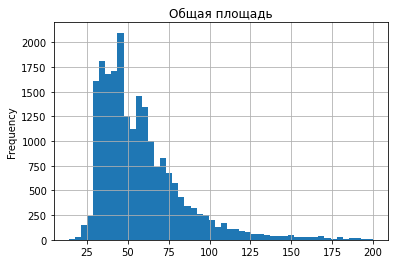

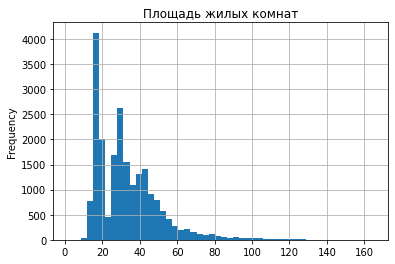

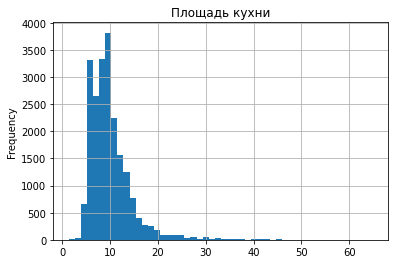

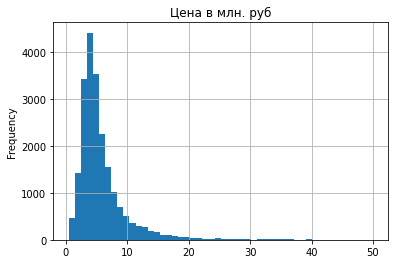

,total_area,living_area,kitchen_area,last_price
count,21405.000000,21405.000000,21405.000000,21405.000000
mean,57.963312,33.465976,10.014776,5.837073
std,25.996811,17.208852,4.623741,4.498231
min,14.000000,2.000000,1.300000,0.430000
25%,40.000000,18.800000,7.000000,3.450000
50%,52.000000,30.000000,9.000000,4.600000
75%,68.700000,42.000000,11.500000,6.650000
max,200.000000,164.700000,65.000000,50.000000


In [25]:
data['total_area'].plot(kind='hist', bins=50, grid=True, title='Общая площадь')
plt.show()
data['living_area'].plot(kind='hist', bins=50, grid=True, title='Площадь жилых комнат')
plt.show()
data['kitchen_area'].plot(kind='hist', bins=50, grid=True, title='Площадь кухни')
plt.show()
data['last_price'].plot(kind='hist', bins=50, grid=True, title='Цена в млн. руб')
plt.show()
data[['total_area', 'living_area', 'kitchen_area', 'last_price']].describe()

Изучив графики и статистическое описание приходим к выводу, что основная часть квартир размером от 35-40 до 70 м2 и за них просят от 3.5 до 6.7 млн. руб.

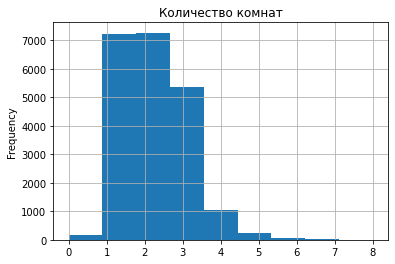

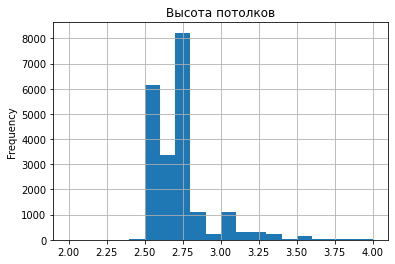

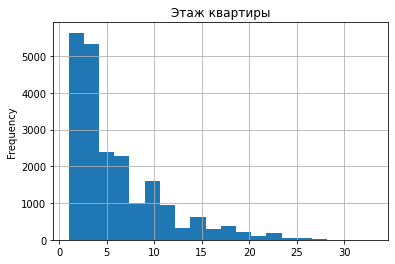

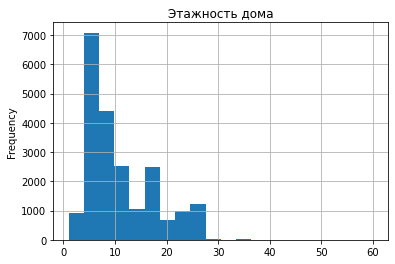

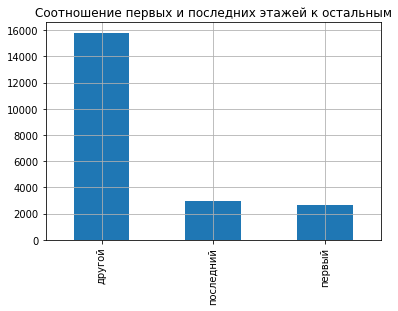

,rooms,ceiling_height,floor,floors_total
count,21405.000000,21405.000000,21405.000000,21405.000000
mean,2.042747,2.694469,5.888671,10.703621
std,0.992023,0.202285,4.858162,6.560365
min,0.000000,2.000000,1.000000,1.000000
25%,1.000000,2.550000,2.000000,5.000000
50%,2.000000,2.700000,4.000000,9.000000
75%,3.000000,2.700000,8.000000,16.000000
max,8.000000,4.000000,33.000000,60.000000


In [26]:
data['rooms'].plot(kind='hist', bins=9, grid=True, title='Количество комнат')
plt.show()
data['ceiling_height'].plot(kind='hist', bins=20, grid=True, title='Высота потолков')
plt.show()
data['floor'].plot(kind='hist', bins=20, grid=True, title='Этаж квартиры')
plt.show()
data['floors_total'].plot(kind='hist', bins=20, grid=True, title='Этажность дома')
plt.show()
data['floor_type'].value_counts().plot(kind='bar', grid=True, title='Соотношение первых и последних этажей к остальным')
plt.show()
data[['rooms', 'ceiling_height', 'floor', 'floors_total']].describe()

Берём на заметку:
- большая часть выборки - квартиры от 1 до 3х комнат;
- этажность имеет больше значений на более высоких значениях, а этаж - на более низких, значит продаётся больше квартир с первых этажей;

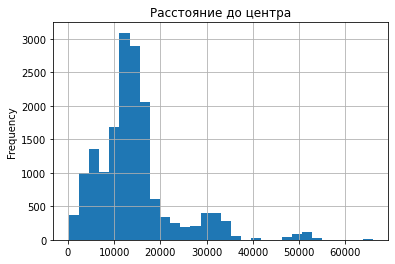

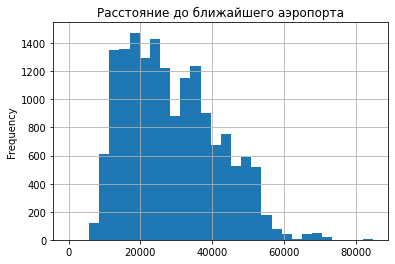

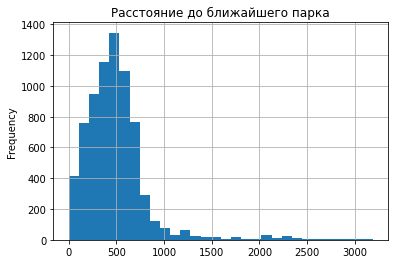

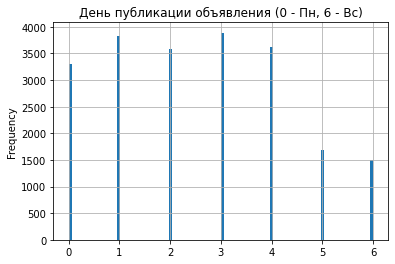

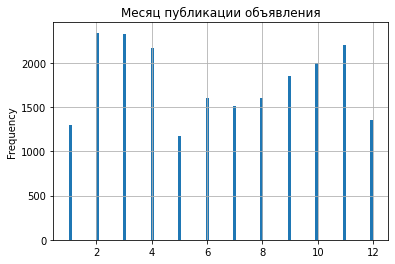

,cityCenters_nearest,airports_nearest,parks_nearest,day_of_week_exposition,month_exposition
count,16529.000000,16511.000000,7258.000000,21405.000000,21405.000000
mean,14383.197411,28835.079159,489.941444,2.548517,6.420976
std,8645.168107,12723.727380,338.142975,1.783336,3.465232
min,181.000000,0.000000,1.000000,0.000000,1.000000
25%,9618.000000,18444.500000,288.000000,1.000000,3.000000
50%,13174.000000,26871.000000,455.000000,2.000000,6.000000
75%,16318.000000,37412.000000,612.000000,4.000000,10.000000
max,65968.000000,84869.000000,3190.000000,6.000000,12.000000


In [27]:
data['cityCenters_nearest'].plot(kind='hist', bins=30, grid=True, title='Расстояние до центра')
plt.show()
data['airports_nearest'].plot(kind='hist', bins=30, grid=True, title='Расстояние до ближайшего аэропорта')
plt.show()
data['parks_nearest'].plot(kind='hist', bins=30, grid=True, title='Расстояние до ближайшего парка')
plt.show()
data['day_of_week_exposition'].plot(kind='hist', bins=100, grid=True, title='День публикации объявления (0 - Пн, 6 - Вс)')
plt.show()
data['month_exposition'].plot(kind='hist', bins=100, grid=True, title='Месяц публикации объявления')
plt.show()
data[['cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'day_of_week_exposition', 'month_exposition']].describe()

Можем сделать следующие выводы:
- наибольшое количество квартир удалено от центра на 9-16 км;
- в 10 км от аэропорта и ближе квартиры почти не продаются;
- у достаточно большого количества квартир ближайший парк находится в пределах километра; 
- на выходных выкладывают гораздо меньше обявлений, чем в будние дни, самые популярные дни - вторник и четверг;
- больше всего объявлений публикуется в начале нового года с февраля по апрель, с августа по ноябрь наблюдается рост количества публикаций, самое непопулярное время - месяц до и после нового года (декабрь и январь) и месяц май;

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Отличные графики и анализ. Здорово, что подписываешь графики и подбираешь оптмальное количество корзин для каждого признака.

#### 4.2 Изучаем, как быстро продавались квартиры

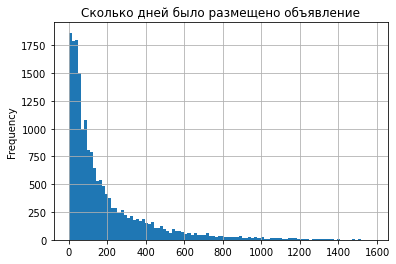

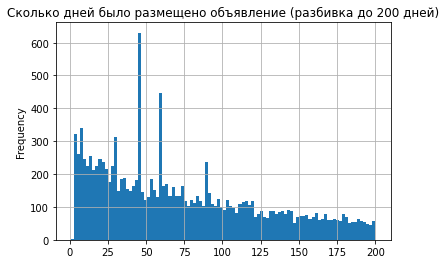

count    18482.000000
mean       183.301537
std        220.464002
min          1.000000
25%         44.000000
50%         99.500000
75%        236.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [28]:
data['days_exposition'].plot(kind='hist', bins=100, grid=True, title='Сколько дней было размещено объявление')
plt.show()
(
    data
    .query('days_exposition <= 200')['days_exposition']
    .plot(kind='hist', bins=100, grid=True, title='Сколько дней было размещено объявление (разбивка до 200 дней)')
)
plt.show()
data['days_exposition'].describe()

Изучив графики и основные статистические показатели, можем сделать следующие выводы:
- среднее арифметическое время продажи квартиры - 183 дней, медианное значение - 100 дней, вероятно, чаще всего квартиру удаётся продать в срок между 3 и 6 месяцами;
- продажи быстрее 44 дней (первый квартиль) можно считать очень быстрыми, а дольше 236 дней (третий квартиль) - уже долгими;

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

#### 4.3 Изучаем, какие факторы больше всего влияют на полную стоимость объекта

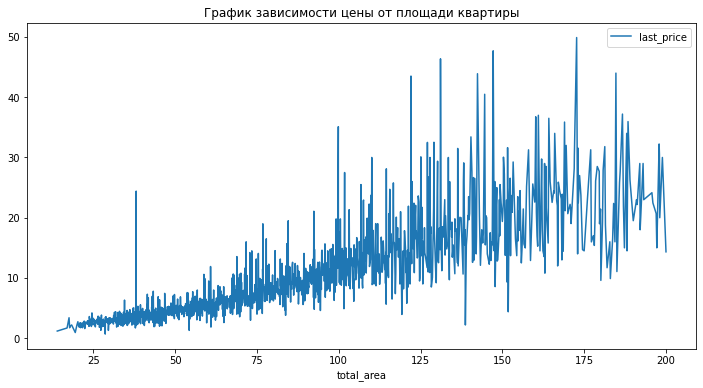

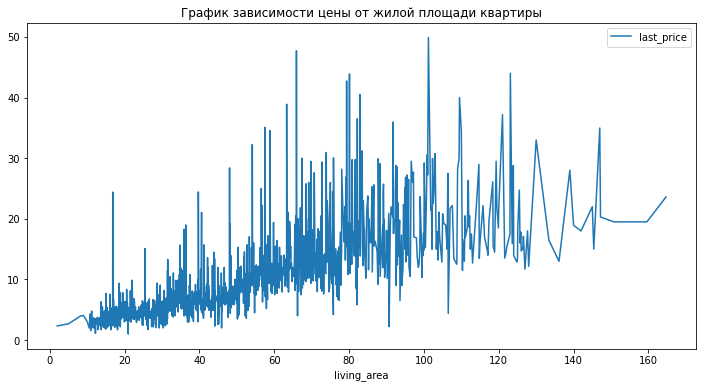

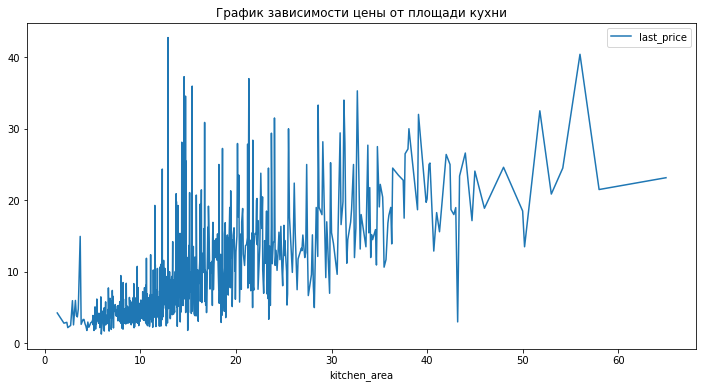

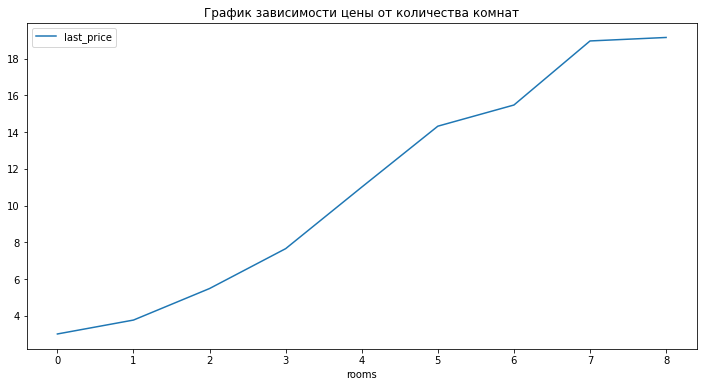

total_area      0.769299
living_area     0.673317
kitchen_area    0.603868
rooms           0.483968
last_price      1.000000
Name: last_price, dtype: float64

In [29]:
data.pivot_table(index='total_area', values='last_price').plot(title='График зависимости цены от площади квартиры', figsize=(12, 6))
data.pivot_table(index='living_area', values='last_price').plot(title='График зависимости цены от жилой площади квартиры', figsize=(12, 6))
data.pivot_table(index='kitchen_area', values='last_price').plot(title='График зависимости цены от площади кухни', figsize=(12, 6))
data.pivot_table(index='rooms', values='last_price').plot(title='График зависимости цены от количества комнат', figsize=(12, 6))
plt.show()
data[['total_area', 'living_area', 'kitchen_area', 'rooms', 'last_price']].corr()['last_price']

Мы видим на графиках и по коэффициентам корреляции, что цена квартиры зависит и от площади жилых помещений, и от площади кухни, и от количества комнат, но все это логично укладывается в самую сильную (по коэффиценту корреляции) формулу - чем больше площадь квартиры - тем больше цена квартиры (в квартирах с большей общей площадью будет больше площадь кухни, будет больше площадь жилых помещений и как следствие больше комнат).

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>


<b>На доработку🤔:</b>
    
Для площадей лучше использовать точечный график по неагрегированным данным. Так у тебя получится диаграмма рассеяния - каждой точке на графике будет соответстовать одно объявление, зависимость будет хорошо видна и график будет выглядеть аккуратнее.
    
Для количества комнат график отличный.

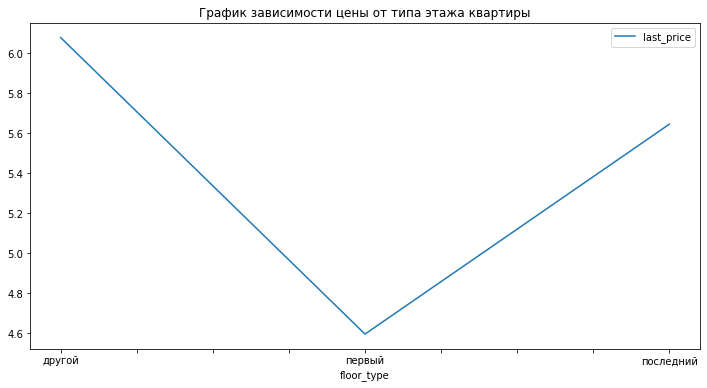

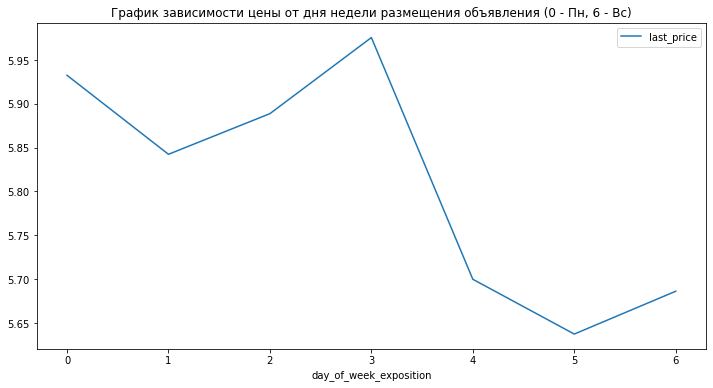

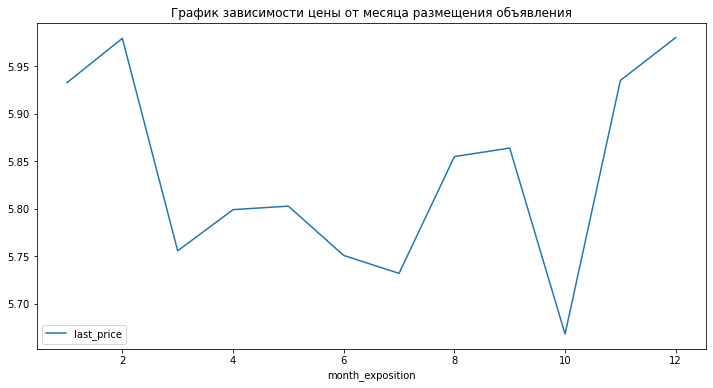

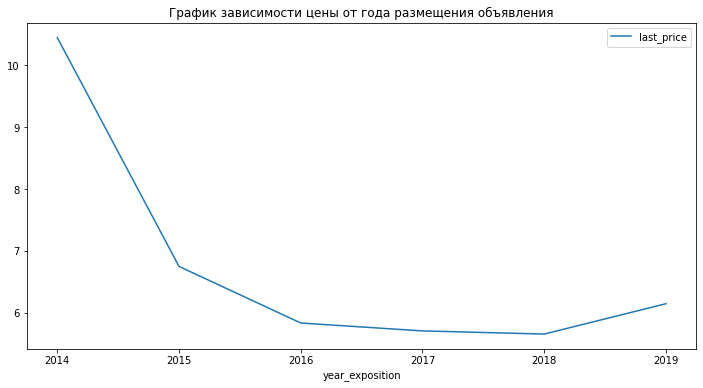

day_of_week_exposition   -0.017585
month_exposition         -0.000721
year_exposition          -0.033500
last_price                1.000000
Name: last_price, dtype: float64

In [30]:
data.pivot_table(index='floor_type', values='last_price').plot(title='График зависимости цены от типа этажа квартиры', figsize=(12, 6))
data.pivot_table(index='day_of_week_exposition', values='last_price').plot(title='График зависимости цены от дня недели размещения объявления (0 - Пн, 6 - Вс)', figsize=(12, 6))
data.pivot_table(index='month_exposition', values='last_price').plot(title='График зависимости цены от месяца размещения объявления', figsize=(12, 6))
data.pivot_table(index='year_exposition', values='last_price').plot(title='График зависимости цены от года размещения объявления', figsize=(12, 6))
plt.show()
data[['day_of_week_exposition', 'month_exposition', 'year_exposition', 'last_price']].corr()['last_price']

День недели и месяц размещения практически не влияют на стоимость квартиры, а судя по графику зависимости от этажа квартиры на первом этаже в среднем дешевле. Коэффициент корреляции говорит, что год размещения объявления так же как и месяц и день недели не влияет на цену квартиры, но график выглядит интересно - пик в 2014, снижение в 2015 и плато в 2016-2018, с небольшим ростом в 2019. Возможно если взять выборку за больший период времени, корреляция проявится и мы сможем сказать, что 2014 был прорывным годом для рынка недвижимости, или наоборот, что в 2015-2019 годах цены на недвижимость упали.

<div style="border:solid green 2px; padding: 20px">

**Шутка:** График зависимости цены от года размещения объявления позволяет сделать однозначный вывод - раньше было лучше.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

#### 4.4 Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и ищем населённые пункты с самой высокой и низкой стоимостью квадратного метра

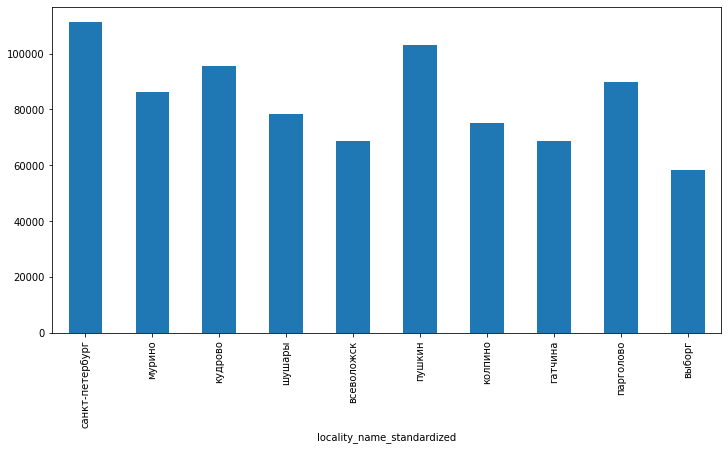

,mean,count
,m2_price,m2_price
locality_name_standardized,,
репино,127678.570000,2
зеленогорск,115122.799583,24
санкт-петербург,111182.859461,14279
бор,105539.260000,1
пушкин,103077.791381,333
...,...,...
фалилеево,16374.105000,2
почап,16037.740000,1


In [31]:
data_m2 = data.pivot_table(index='locality_name_standardized', values='m2_price', aggfunc=['mean', 'count'])

(
    data_m2
    .sort_values(by=[('count', 'm2_price')], ascending=False).head(10)
    .plot(kind='bar', y=('mean', 'm2_price'), legend=False, figsize=(12, 6))
)
plt.show()

data_m2.sort_values(by=[('mean', 'm2_price')], ascending=False)

Из графика и таблицы можем сделать вывод, что среди 10 населённых пунктов с самым большим количеством объявлений Санкт-Петербург - самый дорогой. В общей выборке дороже него только Зеленоград и Репино - самый дорогой населённый пункт. Практически все остальные населённые пункты с самым большим количеством объявлений находятся в доступности общественного транспорта Санкт-Петербурга, в какие-то из них ходят электрички, в какие-то маршрутные такси, в какие-то - метро. Можно считать, что 9 из 10 лидеров по количеству объявлений занимают Санкт-Петербург и его субурбии. 10-е исключение - это город Выборг. Самым же дешёвым будет квадратный метр в посёлке Совхозный.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Отличный график, здорово используешь сводные таблицы.

#### 4.5 Вычисляем среднюю цену каждого километра в Санкт-Петербурге

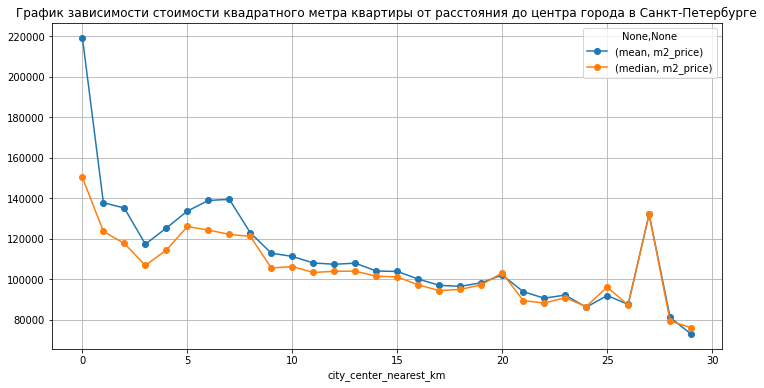

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_standardized,m2_price,day_of_week_exposition,month_exposition,year_exposition,floor_type,city_center_nearest_km


In [32]:
(
data
    .query('locality_name_standardized == "санкт-петербург"')
    .pivot_table(index='city_center_nearest_km', values='m2_price', aggfunc=['mean', 'median'])
    .plot(style='o-',
          grid=True,
          title='График зависимости стоимости квадратного метра квартиры от расстояния до центра города в Санкт-Петербурге',
          figsize=(12,6)
         )
)
plt.show()

data.query('city_center_nearest_km == "27" and locality_name_standardized == "санкт-петербург"')

Визуализировав данные, мы можем увидеть, что близость к центру напрямую коррелирует с ценой на м2 квартиры. Однако стоимость квартир в 3 км от центра резко падает - они дешевле даже тех квартир, что находятся дальше от центра. Чтобы детальнее разобраться в этой особенности, необходимо узнать, что считается центром города, и изучить недвижимость на этом расстоянии. Пик на 27 км от центра можно объяснить малой выборкой.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Общий вывод

Средняя квартира из данной выборки - двушка в Санкт-Петербурге или его пригороде, площадью 55 м2 (32м2 комнаты и 10м2 кухня) и стоимостью в 5.2 млн., в 13 км от центра, 26 км от аэропорта и полукилометре от парка, которую купят за 3-6 месяцев. Объявление о её продаже выложат в будний день в холодный месяц. Если она находится на первом этаже, то будет стоить чуть дешевле.

Неотвеченными остались вопросы с ценой квартир в 3х км от центра Санкт-Петербурга и графиком зависимости от года, возможно изучение этих данных сможет дать какие-то дополнительные инсайты.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Отличные выводы.

<blockquote>

**Общий вывод по проекту**

Спасибо за твой проект! Ты приложил много усилий, чтобы довести его до конца, ты большой молодец! Есть несколько важных моментов, которые я отметил и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях.

**Что понравилось:**
* Аккуратная работа с хорошим оформлением, очень подробным анализом и выводами
* На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
* Качественная разнообразная визуализация

**Что нужно исправить**
* Не нужно удалять строки с пропусками из данных
* Заменить графики для анализа влияния площадей на стоимость квартиры
* Остальные рекомендации ты найдешь в комментариях выше.
   
Если есть вопросы, я готов на них ответить.
    
Для будущего развития в плане визуализации советую обратить внимание на этот гайд по seaborn, библиотеке для визуализаци - примеры кода и графиков на русском
https://nbviewer.org/urls/mipt-stats.gitlab.io/courses/python/09_seaborn.ipynb
    
**Желаю удачи и жду твой проект на повторное ревью!**
</blockquote>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод